# Desafiando a Einstein

Albert Einstein dijo, la velocidad de la luz en el vacío es siempre la misma ... Mis rayos gamma de Mrk421 han viajado durante mucho tiempo por el vacío para llegar desde donde se generaron hasta la Tierra. Veamos si todos han ido a la misma velocidad. Como todos han recorrido la misma distancia, "solo" tengo que mirar si el tiempo entre que salieron de Mrk421 y llegaron a la tierra es el mismo para todos.

------

Empecemos cargando librerías y leyendo los datos, como siempre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
# Leemos los ficheros y les damos un nombre
mrk421_ON= pd.read_csv('data/EvtList_ON_Mrk421.txt', sep=' ')
mrk421_OFF= pd.read_csv('data/EvtList_OFF.txt', sep=' ')

# Definimos la variables de corte had_cut y theta_cut para hacer el Light Curve
# (recuerdas, ponemos el corte para calcular los excesos, no para hacer el Theta Plot)
had_cut = 0.20
theta2_cut = 0.02

# Seleccionamos los datos:
mrk421_ON_cut = mrk421_ON[(mrk421_ON['had'] < had_cut) & (mrk421_ON['theta2'] < theta2_cut)]
mrk421_OFF_cut = mrk421_OFF[(mrk421_OFF['had'] < had_cut) & (mrk421_OFF['theta2'] < theta2_cut)]

# Usaremos el factor de normalización del OFF que hemos encontrado antes
factor = 4.71

In [3]:
mrk421_ON_cut.head()

,Energia,had,theta2,Tiempo
31,172.0,0.006,0.003,9033.70
75,65.0,0.157,0.018,4643.12
170,367.0,0.097,0.003,2497.60
196,177.0,0.074,0.009,3845.38
226,875.0,0.008,0.001,3654.35


En los datos de mrk421 tenemos la columna **Tiempo** que indica el momento en que el telescopio detecta los rayos gamma.

La pregunta es, ¿cómo puedo saber cuanto tiempo ha tardado cada uno de los rayos gamma para viajar desde Mrk421 hasta la Tierra? La respuesta: no puedo. Solo sé cuándo llegan a la Tierra.

Pero si tengo datos en los que la cantidad de rayos gamma cambia con el tiempo, puedo mirar si ese cambio sucede en el mismo momento independientemente de la _energía_ de los ** rayos gamma **.

Los ** rayos gamma ** son fotones y cuando entran en la atmósfera terrestre interaccionan con sus moléculas y generan una casacada de partículas. Algunos fotones llegan a la Tierra con más energía que otros. Cuanta más energía tienen más "fuertemente" chocan con las moléculas de la atmósfera y se generan más partículas. Si hay más partículas, con MAGIC vemos más luz. Esto nos permite asignar a cada evento una energía. En los ficheros:

> **EvtList_ON_Mrk421.txt** y **EvtList_OFF.txt**

No sólo tenemos el ** Hadronness **, el ** Theta Cuadrado ** y el ** Tiempo ** para cada evento, también tenemos su ** Energia ** en GeV. Y podemos seleccionar los Rayos gamma de mayor energía por un lado y los de menor energía por otro. Así los podemos analizar de forma independiente.

La mayoría (si no todas) de las teorías que predicen que la velocidad de la luz en el vacío no es siempre la misma, indican que esta velocidad depende de la energía de la luz, la energía de los ** rayos gamma **.

Definamos dos intervalos de energía en nuestros datos: ** Bajas ** (Energía < 100 GeV) y ** Altas ** (Energía > 500 GeV). Para tener esto, hacemos lo mismo que hemos hecho para cortar en ** Theta Cuadrado ** o ** Hadronness **. 

In [4]:
# 1 Definimos los cortes de "altas energías" y "bajas energías"
cut_highE = 5000
cut_lowE = 1000

# 2 Seleccionamos los datos 
#Alta Energia
mrk421_ON_cut_highE =mrk421_ON_cut[mrk421_ON_cut['Energia']>cut_highE]
mrk421_OFF_cut_highE =mrk421_OFF_cut[mrk421_OFF_cut['Energia']>cut_highE]

# Baja Energia
mrk421_ON_cut_lowE =mrk421_ON_cut[mrk421_ON_cut['Energia']<cut_lowE]
mrk421_OFF_cut_lowE =mrk421_OFF_cut[mrk421_OFF_cut['Energia']<cut_lowE]

Si asumimos que cuando se produce un ** flare**, la fuente aumenta en el mismo momento el número de fotones para todas las energías, podemos hacer un ** Light Curve ** para los dos rangos de energía y mirar si para los dos, la cantidad de ** rayos gamma ** que vemos crece en el mismo momento.

------

Primero haremos el **LightCurve** para altas energías. Luego para bajas. Y luego los combinaremos.
Ahora, en vez de usar 100 intervalos de timepo, usaremos 40.

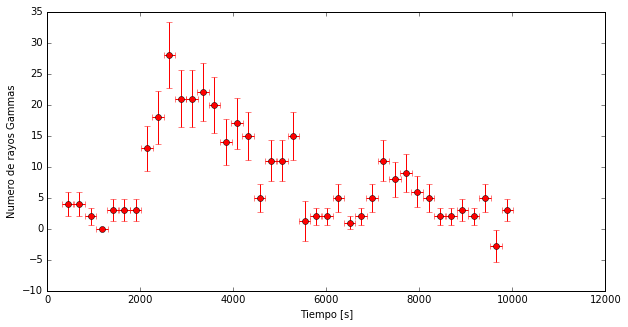

In [5]:
#LightCurve ALtas Energias

weights_high = np.ones_like(mrk421_OFF_cut_highE.theta2)*factor

# 1 Calcular Non y Noff para cada intervalo de tiempo. 
# Definimos 40 intervalos (bins) en los 10000 segundos de nuestros datos
bins = 40
Non, tiempos_highE= np.histogram(mrk421_ON_cut_highE.Tiempo, bins=bins)
Noff, bins_off= np.histogram(mrk421_OFF_cut_highE.Tiempo, bins=tiempos_highE, weights=weights_high)

# 2 Calcular el Exceso y el Error para cada intervalo de tiempo.
Exceso_highE= Non - Noff
Error_highE = (Non+Noff)**0.5

# 3 Representar el lightcurve: los excesos con sus errores a lo largo del tiempo
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
pl.errorbar(tiempos_highE[1:], Exceso_highE, xerr=10000.0/(2.0*bins), yerr= Error_highE, fmt='or', ecolor='red')
pl.xlabel('Tiempo [s]')
pl.ylabel('Numero de rayos Gammas')
pl.show()

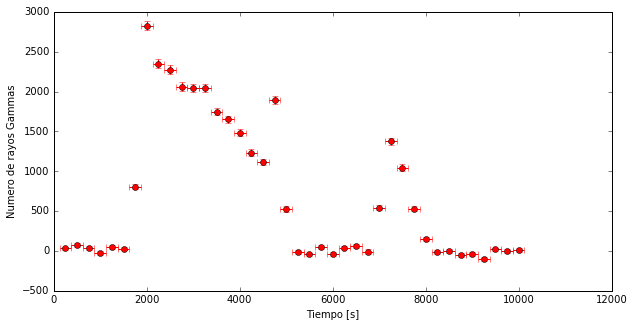

In [6]:
#LightCurve Bajas Energias

weights_low = np.ones_like(mrk421_OFF_cut_lowE.theta2)*factor

# 1 Calcular Non y Noff para cada intervalo de tiempo. 
# Definimos 40 intervalos (bins) en los 10000 segundos de nuestros datos
bins =40
Non, tiempos_lowE= np.histogram(mrk421_ON_cut_lowE.Tiempo, bins=bins)
Noff, bins_off= np.histogram(mrk421_OFF_cut_lowE.Tiempo, bins=tiempos_highE, weights=weights_low)

# 2 Calcular el Exceso y la Significancia para cada intervalo de tiempo.
Exceso_lowE= Non - Noff
Error_lowE = (Non+Noff)**0.5

# 3 Representar el lightcurve: los excesos con sus errores a lo largo del tiempo
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
pl.errorbar(tiempos_lowE[1:], Exceso_lowE, xerr=10000.0/(2.0*bins), yerr= Error_lowE, fmt='or', ecolor='red')
pl.xlabel('Tiempo [s]')
pl.ylabel('Numero de rayos Gammas')
pl.show()


A simple vista vemos que llegan más Gammas de baja energía que de alta energía. Y eso es lo que esperamos.

Pero para ver si hay alguna diferencia de tiempo entre las dos ** Light Curve ** mejor poner las dos en el mismo gráfico. Y de paso, pondremos cada una con su eje del mismo color que los puntos. Veamos como hacerlo.

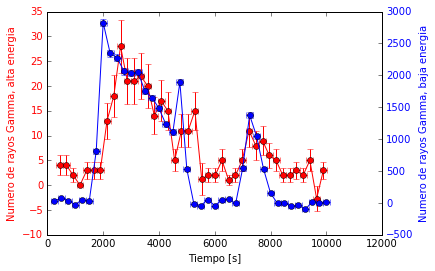

In [7]:
# 4 Representar los excesos con sus errores a lo largo del tiempo

# Usamos la función "pl.subplots()" de la cual podemos recuperar los ejes en ax1
fig, ax1 = pl.subplots()
# Ahora en lugar de llamar pl.errorbar, lo llamamos con ax1.errorbar y
# también ponemos título al eje
ax1.errorbar(tiempos_highE[1:], Exceso_highE, xerr=10000.0/(2.0*bins), yerr=Error_highE, fmt='-or', ecolor='red')
ax1.set_ylabel('Numero de rayos Gamma, alta energia', color='r')

# Ahora la Light Curve para Baja Energía
ax2 = ax1.twinx()
ax2.errorbar(tiempos_lowE[1:], Exceso_lowE, xerr=10000.0/(2.0*bins), yerr=Error_lowE, fmt='-ob', ecolor='blue')
ax2.set_ylabel('Numero de rayos Gamma, baja energia', color='b')
# La Light Curve para Alta Energía la he puesto en rojo (r de red) y 
# la de baja en azul (b de blue).
# Hagamos lo mismo para los ejes, así queda claro qué es qué.
for tl in ax1.get_yticklabels():
    tl.set_color('r')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
ax1.set_xlabel('Tiempo [s]')
pl.show()


Este flare esta lleno de cosas interesantes, parece claro que la cantidad de ** rayos gamma ** de Alta Energía (Rojo) aumentan después que lo hagan los de Baja Energía (Azul). ¿Quiere decir esto que Einstein estaba equivocado...?

-----
Nota:  
Por cierto, para poder comparar mejor las dos ** Light Curve ** he dibujado una linea para unir los puntos. Lo hago con la "-" que pongo en "fmt='-or'" y "fmt='-ob'".

-----
Ahora podemos visualizar los eventos detectados por la cámara como hicimos antes, pero separándolos por energía:

In [1]:
from IPython.display import HTML
HTML("""
<video width="600" height="600" controls="" autoplay="" loop="">
  <source src="data/animation_HighLow.mp4" type="video/mp4">
</video>
""")